In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats
from sklearn.metrics import accuracy_score
import seaborn as sns

In [2]:
data = pd.read_csv("framingham.csv")

In [3]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Handle Missing data:

In [4]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
# Feature: education
data.drop(['education'], axis=1, inplace=True)

In [6]:
# Feature: BPMeds
# drop these rows
data['BPMeds'].isnull().sum()

53

In [7]:
# Feature: Glucose
glucose = list(data.glucose)
glucose.sort()
data['glucose'].fillna(stats.median(np.array(glucose)), inplace=True)

In [8]:
data.dropna(axis=0, inplace=True)

# EDA

## Categorical Features:

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4090 entries, 0 to 4239
Data columns (total 15 columns):
male               4090 non-null int64
age                4090 non-null int64
currentSmoker      4090 non-null int64
cigsPerDay         4090 non-null float64
BPMeds             4090 non-null float64
prevalentStroke    4090 non-null int64
prevalentHyp       4090 non-null int64
diabetes           4090 non-null int64
totChol            4090 non-null float64
sysBP              4090 non-null float64
diaBP              4090 non-null float64
BMI                4090 non-null float64
heartRate          4090 non-null float64
glucose            4090 non-null float64
TenYearCHD         4090 non-null int64
dtypes: float64(8), int64(7)
memory usage: 511.2 KB


Categorical:
- male
- currentSmoker
- BPMeds
- prevalentStroke
- prevalentHyp
- diabetes
- TenYearCHD

Qualitative:
- age
- cigsperday
- totChol
- sysBP
- diaBP
- BMI
- heartRate
- glucose

count    4090.000000
mean        0.490220
std         0.499965
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: currentSmoker, dtype: float64
mode:  0    0
dtype: int64
0    2085
1    2005
Name: currentSmoker, dtype: int64


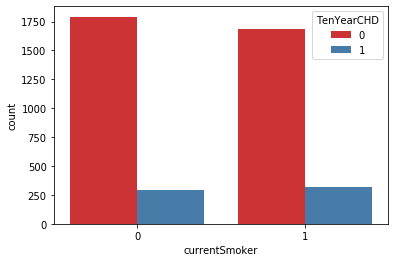

In [116]:
categorical_summarized(data, x='currentSmoker', hue='TenYearCHD')

count    4090.000000
mean        0.029340
std         0.168778
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: BPMeds, dtype: float64
mode:  0    0.0
dtype: float64
0.0    3970
1.0     120
Name: BPMeds, dtype: int64


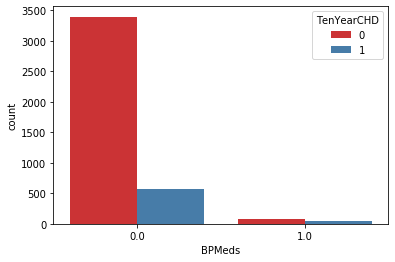

In [117]:
categorical_summarized(data, x='BPMeds', hue='TenYearCHD')

In [120]:
data.drop(['BPMeds'], axis=1, inplace=True)

count    4090.000000
mean        0.005379
std         0.073153
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: prevalentStroke, dtype: float64
mode:  0    0
dtype: int64
0    4068
1      22
Name: prevalentStroke, dtype: int64


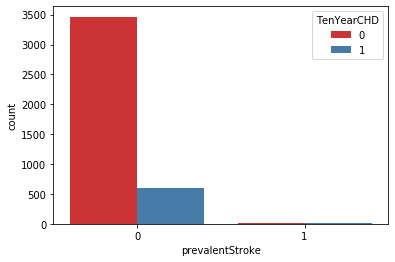

In [118]:
categorical_summarized(data, x='prevalentStroke', hue='TenYearCHD')

In [121]:
data.drop(['prevalentStroke'], axis=1, inplace=True)

count    4090.000000
mean        0.309291
std         0.462258
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: prevalentHyp, dtype: float64
mode:  0    0
dtype: int64
0    2825
1    1265
Name: prevalentHyp, dtype: int64


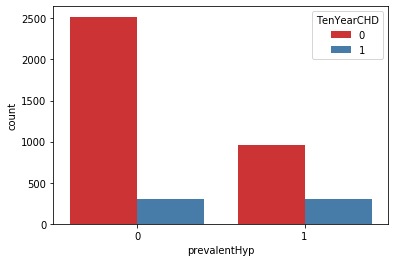

In [119]:
categorical_summarized(data, x='prevalentHyp', hue='TenYearCHD')

count    4090.000000
mean        0.025428
std         0.157440
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: diabetes, dtype: float64
mode:  0    0
dtype: int64
0    3986
1     104
Name: diabetes, dtype: int64


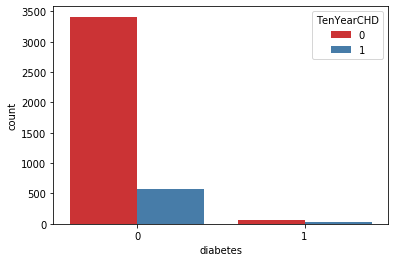

In [123]:
categorical_summarized(data, x='diabetes', hue='TenYearCHD')

In [125]:
data.drop(['diabetes'], axis=1, inplace=True)

count    4090.000000
mean        0.149389
std         0.356515
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: TenYearCHD, dtype: float64
mode:  0    0
dtype: int64
0    3479
1     611
Name: TenYearCHD, dtype: int64


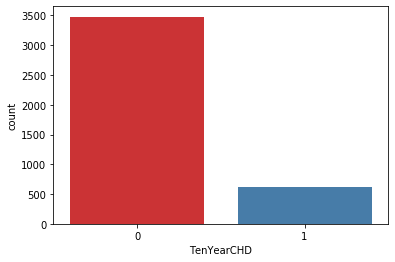

In [126]:
categorical_summarized(data, x='TenYearCHD')

In [32]:
def categorical_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', verbose=True):
    if x==None:
        column_interested=y
    else:
        column_interested=x
    
    series = dataframe[column_interested]
    print(series.describe())
    print('mode: ',series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())
    sns.countplot(x=x, y=y, hue=hue, data=dataframe, palette=palette)

## Qualitative Features:

In [127]:
data.head()

,male,age,currentSmoker,cigsPerDay,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,1,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0



### Split the dataset into:
### Train, Test and validation set

In [106]:
len(data)

4142

In [107]:
train = data[:int(len(data)*0.7)]
test = data[int(len(data)*0.7):int(len(data)*0.85)]
val = data[int(len(data)*0.85):]

In [108]:
print("{},{},{}".format(len(train),len(test),len(val)))

2899,621,622


In [109]:
len(train) + len(test) + len(val)

4142

In [110]:
# train test split
X_train = train.drop(['TenYearCHD'],axis=1)
y_train = train['TenYearCHD']
X_test = test.drop(['TenYearCHD'],axis=1)
y_test = test['TenYearCHD']

### Models without feature selection:

In [111]:
#Logistic Regression:

from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression()
Lr.fit(X_train,y_train)
Lr_pred = Lr.predict(X_test)
print("accuracy:",accuracy_score(y_test, Lr_pred))

accuracy: 0.8631239935587761


C:\Users\MuzammiL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [112]:
#Bayes Classifier:

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
print("accuracy:",accuracy_score(y_test, gnb_pred))

accuracy: 0.8357487922705314


In [113]:
#KNN Classifier:

from sklearn import neighbors
n_neighbors = 6
k = neighbors.KNeighborsClassifier(n_neighbors)
k.fit(X_train, y_train)
K_pred = k.predict(X_test)
print("accuracy:",accuracy_score(y_test, K_pred))

accuracy: 0.8438003220611916


In [114]:
#Decision Tree:

from sklearn import tree
D = tree.DecisionTreeClassifier()
D.fit(X_train, y_train)
D_pred = D.predict(X_test)
print("Accuracy:", accuracy_score(y_test, D_pred))

Accuracy: 0.7648953301127214


In [115]:
#SVM:

from sklearn import svm
sv = svm.SVC()
sv.fit(X_train, y_train)
s_pred = sv.predict(X_test)
print("Accuracy:", accuracy_score(y_test, s_pred))

C:\Users\MuzammiL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.8615136876006442


### Feature Selection:

In [116]:
# Feature Importance:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(data.drop(['TenYearCHD'],axis=1),data['TenYearCHD'])
print(model.feature_importances_)

[0.01430477 0.13564598 0.01481207 0.05340165 0.01325026 0.00436211
 0.02723961 0.01024694 0.11527054 0.13974192 0.12623497 0.11790043
 0.11069795 0.1168908 ]


C:\Users\MuzammiL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [117]:
feat_importances = pd.Series(model.feature_importances_, index=data.drop(['TenYearCHD'],axis=1).columns)

In [118]:
val_imp = list(feat_importances.values)
columns = feat_importances.index

In [127]:
# The percentage effect of all the features on target feature
val_imp

[0.01430477148966575,
 0.13564597607433573,
 0.014812073187323044,
 0.05340164786110072,
 0.013250261544008426,
 0.004362113461362982,
 0.02723960576409523,
 0.010246935986429825,
 0.11527053943449879,
 0.13974192474009792,
 0.12623497402816497,
 0.11790042765341222,
 0.11069795087022649,
 0.11689079790527793]

In [119]:
imp_columns = []
for i,val in enumerate(val_imp):
    if val>=0.10:
        imp_columns.append(columns[i])

In [120]:
imp_columns

['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

In [121]:
X_train = X_train[imp_columns]
X_test = X_test[imp_columns]

### Model after feature selection:

In [130]:
#Logistic Regression:

from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression(max_iter=900)
Lr.fit(X_train,y_train)
Lr_pred = Lr.predict(X_test)
print("accuracy:",accuracy_score(y_test, Lr_pred))

accuracy: 0.8631239935587761


C:\Users\MuzammiL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [123]:
#Bayes Classifier:

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
print("accuracy:",accuracy_score(y_test, gnb_pred))

accuracy: 0.8454106280193237


In [124]:
#KNN Classifier:

from sklearn import neighbors
n_neighbors = 6
k = neighbors.KNeighborsClassifier(n_neighbors)
k.fit(X_train, y_train)
K_pred = k.predict(X_test)
print("accuracy:",accuracy_score(y_test, K_pred))

accuracy: 0.8518518518518519


In [125]:
#Decision Tree:

from sklearn import tree
D = tree.DecisionTreeClassifier()
D.fit(X_train, y_train)
D_pred = D.predict(X_test)
print("Accuracy:", accuracy_score(y_test, D_pred))

Accuracy: 0.7729468599033816


In [126]:
#SVM:

from sklearn import svm
sv = svm.SVC(max_iter=2000)
sv.fit(X_train, y_train)
s_pred = sv.predict(X_test)
print("Accuracy:", accuracy_score(y_test, s_pred))

C:\Users\MuzammiL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.8615136876006442


C:\Users\MuzammiL\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
